In [10]:
!unzip /content/10_country_test.zip

Archive:  /content/10_country_test.zip
   creating: 10_country_test/
   creating: 10_country_test/test/
   creating: 10_country_test/test/Argentina/
  inflating: 10_country_test/test/Argentina/0 (1).jpeg  
  inflating: 10_country_test/test/Argentina/0 (1).jpg  
  inflating: 10_country_test/test/Argentina/0 (1).png  
  inflating: 10_country_test/test/Argentina/0 (10).jpeg  
  inflating: 10_country_test/test/Argentina/0 (10).jpg  
  inflating: 10_country_test/test/Argentina/0 (11).jpeg  
  inflating: 10_country_test/test/Argentina/0 (11).jpg  
  inflating: 10_country_test/test/Argentina/0 (12).jpeg  
  inflating: 10_country_test/test/Argentina/0 (12).jpg  
  inflating: 10_country_test/test/Argentina/0 (13).jpeg  
  inflating: 10_country_test/test/Argentina/0 (13).jpg  
  inflating: 10_country_test/test/Argentina/0 (14).jpeg  
  inflating: 10_country_test/test/Argentina/0 (14).jpg  
  inflating: 10_country_test/test/Argentina/0 (15).jpeg  
  inflating: 10_country_test/test/Argentina/0 (15

In [0]:
rm -rf /content/10_country_test/test/Saudi*

In [1]:
!wget https://github.com/ShahariarRabby/National-Flag-Detection/raw/master/10_country_train_1.zip
!wget https://github.com/ShahariarRabby/National-Flag-Detection/blob/master/10_country_train_2.zip
!wget https://raw.githubusercontent.com/ShahariarRabby/National-Flag-Detection/master/10_country_test.zip


--2019-08-07 22:19:29--  https://github.com/ShahariarRabby/National-Flag-Detection/raw/master/10_country_train_1.zip
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ShahariarRabby/National-Flag-Detection/master/10_country_train_1.zip [following]
--2019-08-07 22:19:29--  https://raw.githubusercontent.com/ShahariarRabby/National-Flag-Detection/master/10_country_train_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48856370 (47M) [application/zip]
Saving to: ‘10_country_train_1.zip’

10_country_train_1. 100%[===================>]  46.59M  80.4MB/s    in 0.6s    

2019-08-07 22:19:30 (80.4 MB/s

In [2]:
!unzip 10_country_train_1.zip
# !unzip 10_country_train_2.zip
# !unzip 10_country_test.zip
!cp -r ./10_country_train_1/* ./10_country_train_2 && rm -R ./10_country_train_1/*

Archive:  10_country_train_1.zip
   creating: 10_country_train_1/
   creating: 10_country_train_1/train/
   creating: 10_country_train_1/train/Argentina/
  inflating: 10_country_train_1/train/Argentina/0 (1).jpeg  
  inflating: 10_country_train_1/train/Argentina/0 (1).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (1).png  
  inflating: 10_country_train_1/train/Argentina/0 (10).jpeg  
  inflating: 10_country_train_1/train/Argentina/0 (10).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (10).png  
  inflating: 10_country_train_1/train/Argentina/0 (100).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (101).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (102).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (103).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (104).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (105).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (106).jpg  
  inflating: 10_country_train_1/train/Argentina

In [3]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import  confusion_matrix

from __future__ import print_function

import keras
from keras import backend as K
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import load_model
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.utils.vis_utils import model_to_dot
from keras.utils.generic_utils import get_custom_objects
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D
from keras.layers import Activation, Add, BatchNormalization, Dropout

Using TensorFlow backend.


In [4]:
# Set the CNN model 

model = Sequential()


model.add(Conv2D(activation ='relu', input_shape = (64,64,3), filters=64, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu',filters=64, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(activation ='relu', filters=512, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=512, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(activation ='relu', filters=256, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=256, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=256, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(activation ='relu', filters=128, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=128, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))



model.add(Flatten())
model.add(Dense(units = 100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 5, activation='softmax', kernel_initializer='uniform'))

model.summary()

W0807 22:20:51.099809 139992882599808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 22:20:51.145375 139992882599808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 22:20:51.151858 139992882599808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 22:20:51.193281 139992882599808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0807 22:20:51.306431 139992882599808 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 512)       295424    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 512)       2359808   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 512)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 256)       1179904   
__________

In [0]:
# Define the optimizer
optimizer = Adam(lr=0.001)

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])

In [0]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
train_datagen = ImageDataGenerator(
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


test_datagen = ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [26]:
train_generator = train_datagen.flow_from_directory(
                                                    '10_country_train_2/',
                                                    target_size=(64, 64),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                    '10_country_test/test',
                                                    target_size=(64, 64),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 2163 images belonging to 5 classes.
Found 541 images belonging to 5 classes.


In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [28]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=4283 /30,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1,
                    callbacks=[learning_rate_reduction])

Epoch 1/20
143/142 [==============================] - 22s 157ms/step - loss: 0.5304 - acc: 0.8534 - val_loss: 0.2851 - val_acc: 0.9424
Epoch 2/20
143/142 [==============================] - 21s 144ms/step - loss: 0.3207 - acc: 0.9198 - val_loss: 0.3084 - val_acc: 0.9483
Epoch 3/20
143/142 [==============================] - 21s 146ms/step - loss: 0.2866 - acc: 0.9343 - val_loss: 0.1886 - val_acc: 0.9653
Epoch 4/20
143/142 [==============================] - 21s 146ms/step - loss: 0.2679 - acc: 0.9382 - val_loss: 0.1735 - val_acc: 0.9759
Epoch 5/20
143/142 [==============================] - 21s 145ms/step - loss: 0.1728 - acc: 0.9627 - val_loss: 0.2059 - val_acc: 0.9689
Epoch 6/20
143/142 [==============================] - 21s 145ms/step - loss: 0.1700 - acc: 0.9639 - val_loss: 0.1684 - val_acc: 0.9764
Epoch 7/20
143/142 [==============================] - 21s 144ms/step - loss: 0.2539 - acc: 0.9459 - val_loss: 0.2450 - val_acc: 0.9575
Epoch 8/20
143/142 [==============================] - 2

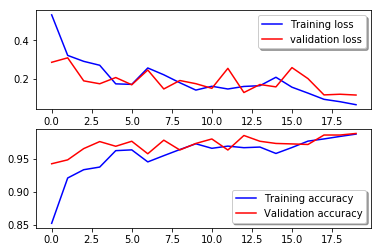

In [29]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [30]:
from keras.preprocessing import image

test = image.load_img('10_country_test/test/Argentina/0 (1).jpg',
                      target_size=(64, 64))
test = image.img_to_array(test)
test = np.expand_dims(test, axis=0)

print(model.predict(test))
print(train_generator.class_indices)

[[1.5962140e-18 1.2322114e-12 7.0089114e-21 3.4962816e-10 1.0000000e+00]]
{'Argentina': 0, 'Australia': 1, 'Brazil': 2, 'China': 3, 'Germany': 4}


In [0]:
model.save('model.h5')